In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import random
import time

In [3]:
#找到触电点之后的数据为训练数据
import os
def create_data(csv_id1, csv_id2, filepath):
    Data_train = []
    #找触电点步长
    point_find_step = 10
    threshold = 1.0
    for i in range(csv_id1,csv_id2):
        file_path = os.getcwd()+'\\'+filepath+'\\'+str(i)+'.csv'
        csv_data = pd.read_csv(open(file_path), usecols=[1,2,5,6],encoding='utf-8') 
        csv_data = np.array(csv_data)
    #从触电点开始判断,找到大概开始变化的位置前
        left, right = 0, len(csv_data) - 1
        while left < right:
            if abs(csv_data[left,1]) > threshold:
                break
            left = left + point_find_step
        while right > left:
            if abs(csv_data[right,1]) > threshold:
                break
            right = right - point_find_step
        if left > 0:
            left = left - point_find_step//2
        if right < len(csv_data) - 1:
            left = left + point_find_step//2
        Data_train.extend(csv_data[left:right+1])
    Data_train = np.array(Data_train)
#     print('len_data =',len(Data_train))
    Data_train = Data_train.reshape(-1,4)
    return Data_train

def create_animal(csv_id1, csv_id2):
    Data_train = []
    #找触电点步长
    point_find_step = 10
    threshold = 2.0
    for i in range(csv_id1,csv_id2):
        file_path = os.getcwd()+'\\animal\\'+str(i)+'.csv'
        csv_data = pd.read_csv(open(file_path), usecols=[1,2,5,6],encoding='utf-8') 
        csv_data = np.array(csv_data)
    #从触电点开始判断,找到大概开始变化的位置前
        left, right = 0, len(csv_data) - 1
        while left < right:
            if abs(csv_data[left,2]) > threshold:
                break
            left = left + point_find_step
        while right > left:
            if abs(csv_data[right,2]) > threshold:
                break
            right = right - point_find_step
        if left > 0:
            left = left - point_find_step//2
        if right < len(csv_data) - 1:
            left = left + point_find_step//2
        Data_train.extend(csv_data[left:right+1])
    Data_train = np.array(Data_train)
#     print('len_data =',len(Data_train))
    Data_train = Data_train.reshape(-1,4)
    return Data_train

def estimator_feature(estimator, X, Y, isNormalized = 0):
#     print(len(X))
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
    estimator.fit(X_train.reshape(-1,1),y_train)
    y_predict = estimator.predict(X_test.reshape(-1,1))
    #计算平均损失
    cost = 5000*sum((y_predict - y_test)**2)/len(X_test)
    score = estimator.score(X_test.reshape(-1,1), y_test)
    X_max = np.max(X)
    X_min = np.min(X)
    Y_max = np.max(Y)
    Y_min = np.min(Y)
    return [X_max,X_min,Y_max,Y_min,cost,score]

def get_feature():
    Data1 = []
    for i in range(1, 66):
        X = create_data(i,i+1,'plants')
        if len(X)==0:
            continue
        lr = LinearRegression()
        feature = estimator_feature(lr,X[:,3],X[:,2],0)
        Data1.append(feature)
    y1 = [1 for x in range(len(Data1))]
    print(len(Data1),len(y1))
    
    Data2 = []
    for i in range(1, 101):
        X = create_data(i,i+1,'indirect')
        if len(X)==0:
            continue
        lr = LinearRegression()
        feature = estimator_feature(lr,X[:,3],X[:,2],0)
        Data2.append(feature)
    y2 = [2 for x in range(len(Data2))]
    print(len(Data2),len(y2))
    
    Data3 = []
    for i in range(1, 76):
        X = create_animal(i,i+1)
        if len(X)==0:
            continue
        lr = LinearRegression()
        feature = estimator_feature(lr,X[:,3],X[:,2],0)
        Data3.append(feature)
    y3 = [3 for x in range(len(Data3))]
    print(len(Data3),len(y3))
    
    Data = Data1+Data2+Data3
    y = y1+y2+y3
    Data = np.array(Data)
    y = np.array(y)
    
    return Data,y

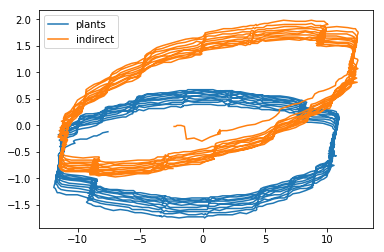

In [4]:
X1=create_data(1,2,'plants')
X2=create_data(1,2,'indirect')
X3=create_animal(1,2)
plt.plot(X1[:,3],X1[:,2],label='plants')
plt.plot(X2[:,3],X2[:,2],label='indirect')
plt.legend()
# plt.plot(X3[:,3],X3[:,2],label='animal')

In [27]:
X, y = get_feature()
print(len(X),len(y))

classfier = {1:'plants',2:'indirect',3:'animal'}

64 64
100 100
75 75
239 239


In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)
clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=1337)
clf.fit(X,y)
print(clf.score(X,y))

1.0


In [25]:
Data1 = []
for i in range(66, 76):
    X = create_data(i,i+1,'plants')
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    Data1.append(feature)
Data1 = np.array(Data1)
y = clf.predict(Data1.reshape(-1,6))
print(y)

Data2 = []
for i in range(101, 121):
    X = create_data(i,i+1,'indirect')
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    Data2.append(feature)
Data2 = np.array(Data2)
y = clf.predict(Data2.reshape(-1,6))
print(y)

Data3 = []
for i in range(76, 86):
    X = create_animal(i,i+1)
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    Data3.append(feature)
Data3 = np.array(Data3)
y = clf.predict(Data3.reshape(-1,6))
print(y)

[1 2 1 1 1 2 1 1 1 1]
[2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 1 1 2]
[3 3 3 3 3 3 3 3 3 3]


In [28]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X,y)
print(ada_clf.score(X,y))

0.811715481172


In [29]:
res = []
for i in range(66, 76):
    X = create_data(i,i+1,'plants')
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    feature = np.array(feature)
    y = ada_clf.predict(feature.reshape(-1,6))
    res.extend(y)
print(res)

res = []
for i in range(101, 121):
    X = create_data(i,i+1,'indirect')
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    feature = np.array(feature)
    y = ada_clf.predict(feature.reshape(-1,6))
    res.extend(y)
print(res)

res = []
for i in range(76, 86):
    X = create_animal(i,i+1)
    if len(X)==0:
        continue
    lr = LinearRegression()
    feature = estimator_feature(lr,X[:,3],X[:,2],0)
    feature = np.array(feature)
    y = ada_clf.predict(feature.reshape(-1,6))
    res.extend(y)
print(res)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
